<a href="https://colab.research.google.com/github/supriya-cybertech/MachineLearning-Project/blob/main/Diabetes_Prediction_Modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Own Diabetes Predictive Model**

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
names = ["Num_of_Preg","Glucose_Conc","BP","Skin_Thickness","TwoHour_Insulin","BMI","DM_Pedigree","Age","Class"]

In [ ]:
import pandas as pd
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import pandas as pd

# Example: reading a CSV file into a DataFrame
df = pd.read_csv("/content/diabetes.csv")

# Now this will work
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.shape


(768, 9)

In [ ]:
# Check For Missing Values
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Data Types
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
# Check For Occurence of Class
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

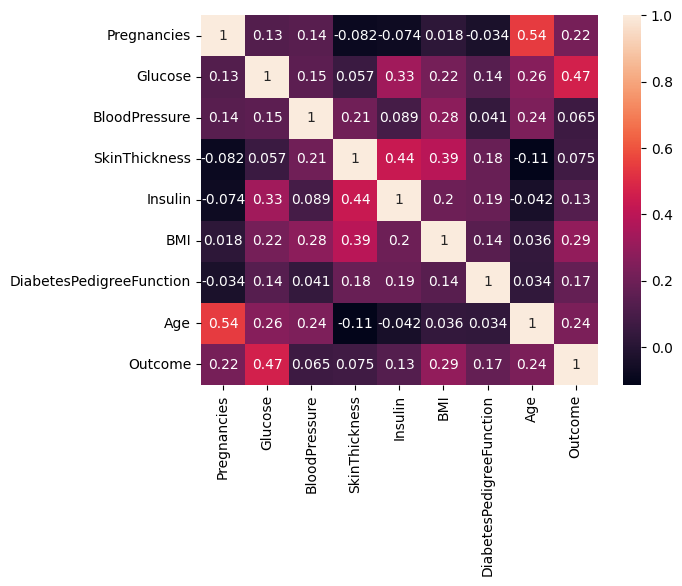

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # optional, for showing plots

# Example: if you already have a DataFrame df
corr = df.corr()  # create correlation matrix

sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#### Data Viz of Entire Dataset

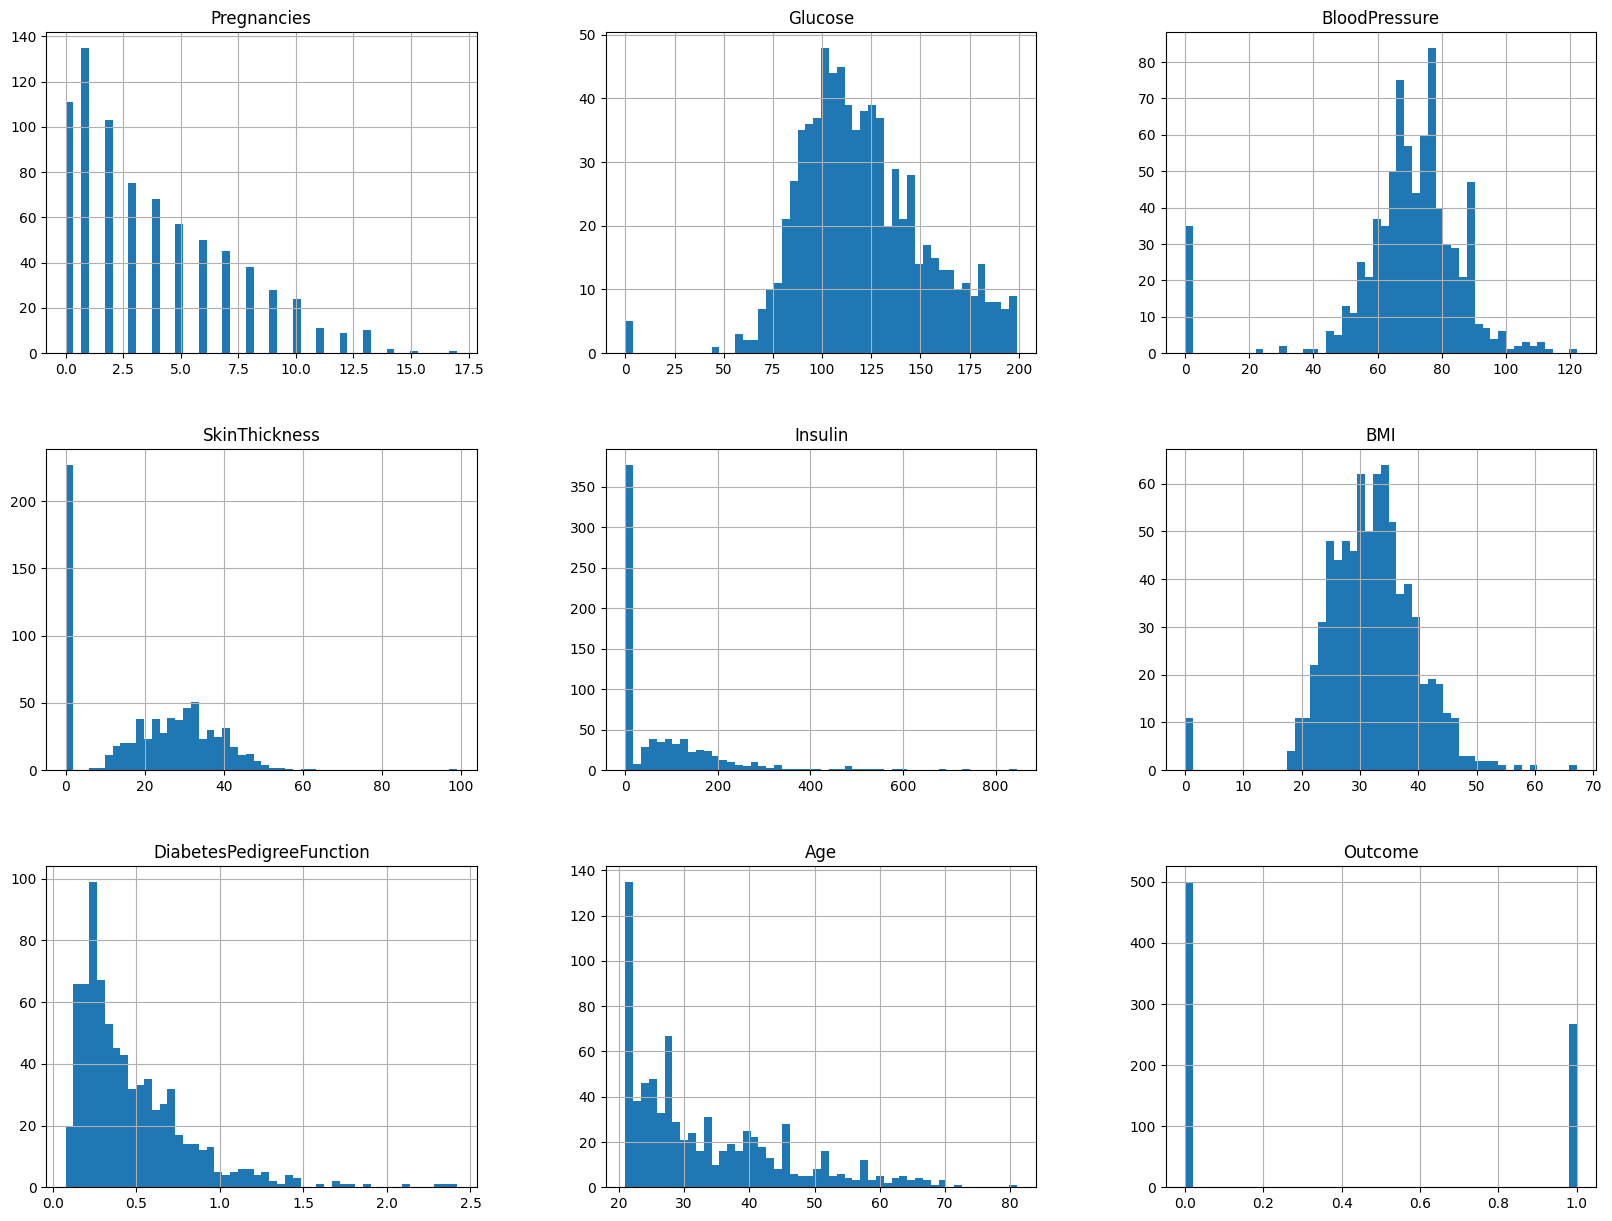

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Show column names so you can confirm
print("Columns:", df.columns.tolist())

# Replace with the actual names from your dataset
bp_col = 'BloodPressure'  # change if needed
bmi_col = 'BMI'           # change if needed

# Remove rows where BP or BMI are zero
df = df[(df[bp_col] != 0) & (df[bmi_col] != 0)].reset_index(drop=True)

print("Cleaned data shape:", df.shape)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Cleaned data shape: (729, 9)


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Check actual names
print(df.columns.tolist())

# Replace with the correct BP column name
df['BloodPressure'].min()


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


0

In [ ]:
# Checking For Minimum BMI
df['BMI'].min()

0.0

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Try common BP column names
for col in ['BP', 'BloodPressure', 'Blood_Pressure', 'Blood Pressure']:
    if col in df.columns:
        df[col] = df[col].replace(0, df[col].median())
        print(f"Replaced 0 with median in column: {col}")
        break
else:
    print("BP column not found. Available columns:", df.columns.tolist())

Replaced 0 with median in column: BloodPressure


In [ ]:
# Replace 0 with Median not Mean
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())

In [ ]:
df.columns = df.columns.str.strip()

# Try common insulin column names
for col in ['TwoHour_Insulin', 'TwoHourInsulin', '2HourInsulin', 'Insulin']:
    if col in df.columns:
        print(f"Minimum value in {col}:", df[col].min())
        break
else:
    print("Insulin column not found. Available columns:", df.columns.tolist())

Minimum value in Insulin: 0


In [ ]:
df.columns = df.columns.str.strip()

# Try common insulin column names
for col in ['TwoHour_Insulin', 'TwoHourInsulin', '2HourInsulin', 'Insulin']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled NaN in {col} with median value.")
        break
else:
    print("Insulin column not found. Available columns:", df.columns.tolist())

Filled NaN in Insulin with median value.


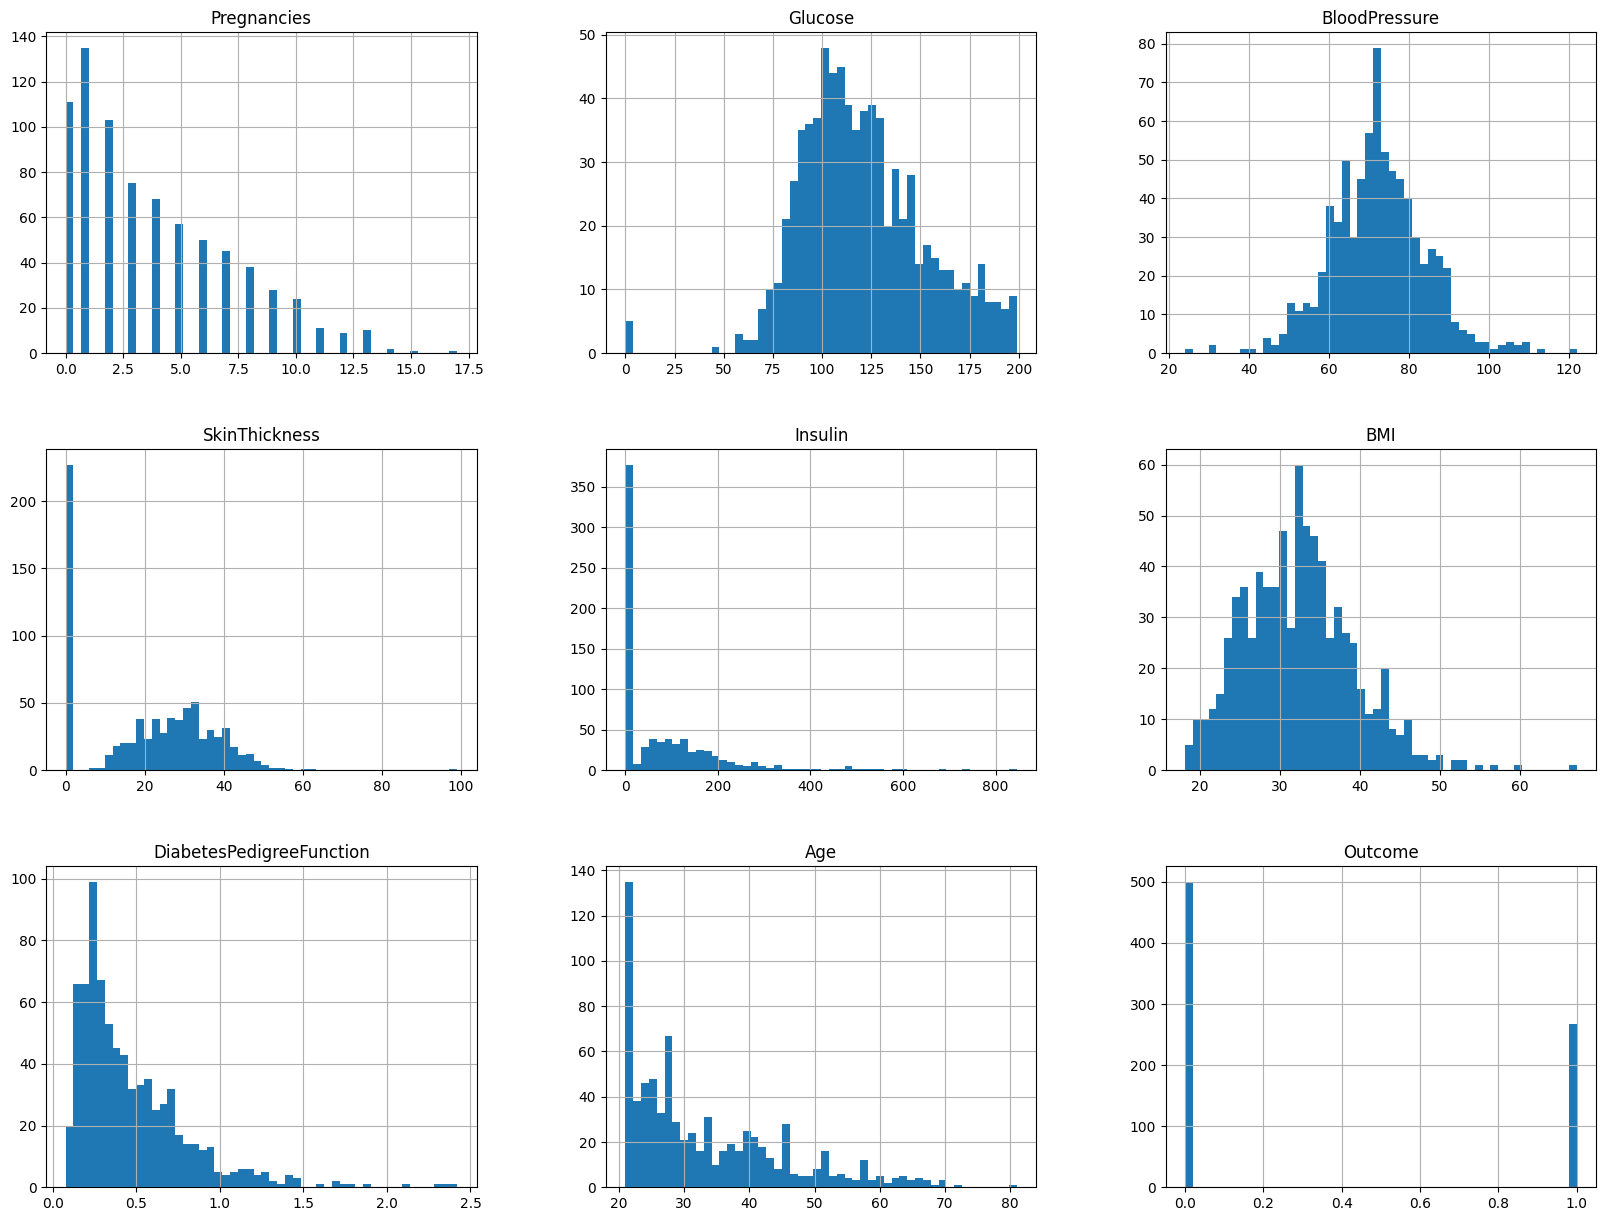

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# Checking For Null Values or NO
import missingno as no

<Axes: >

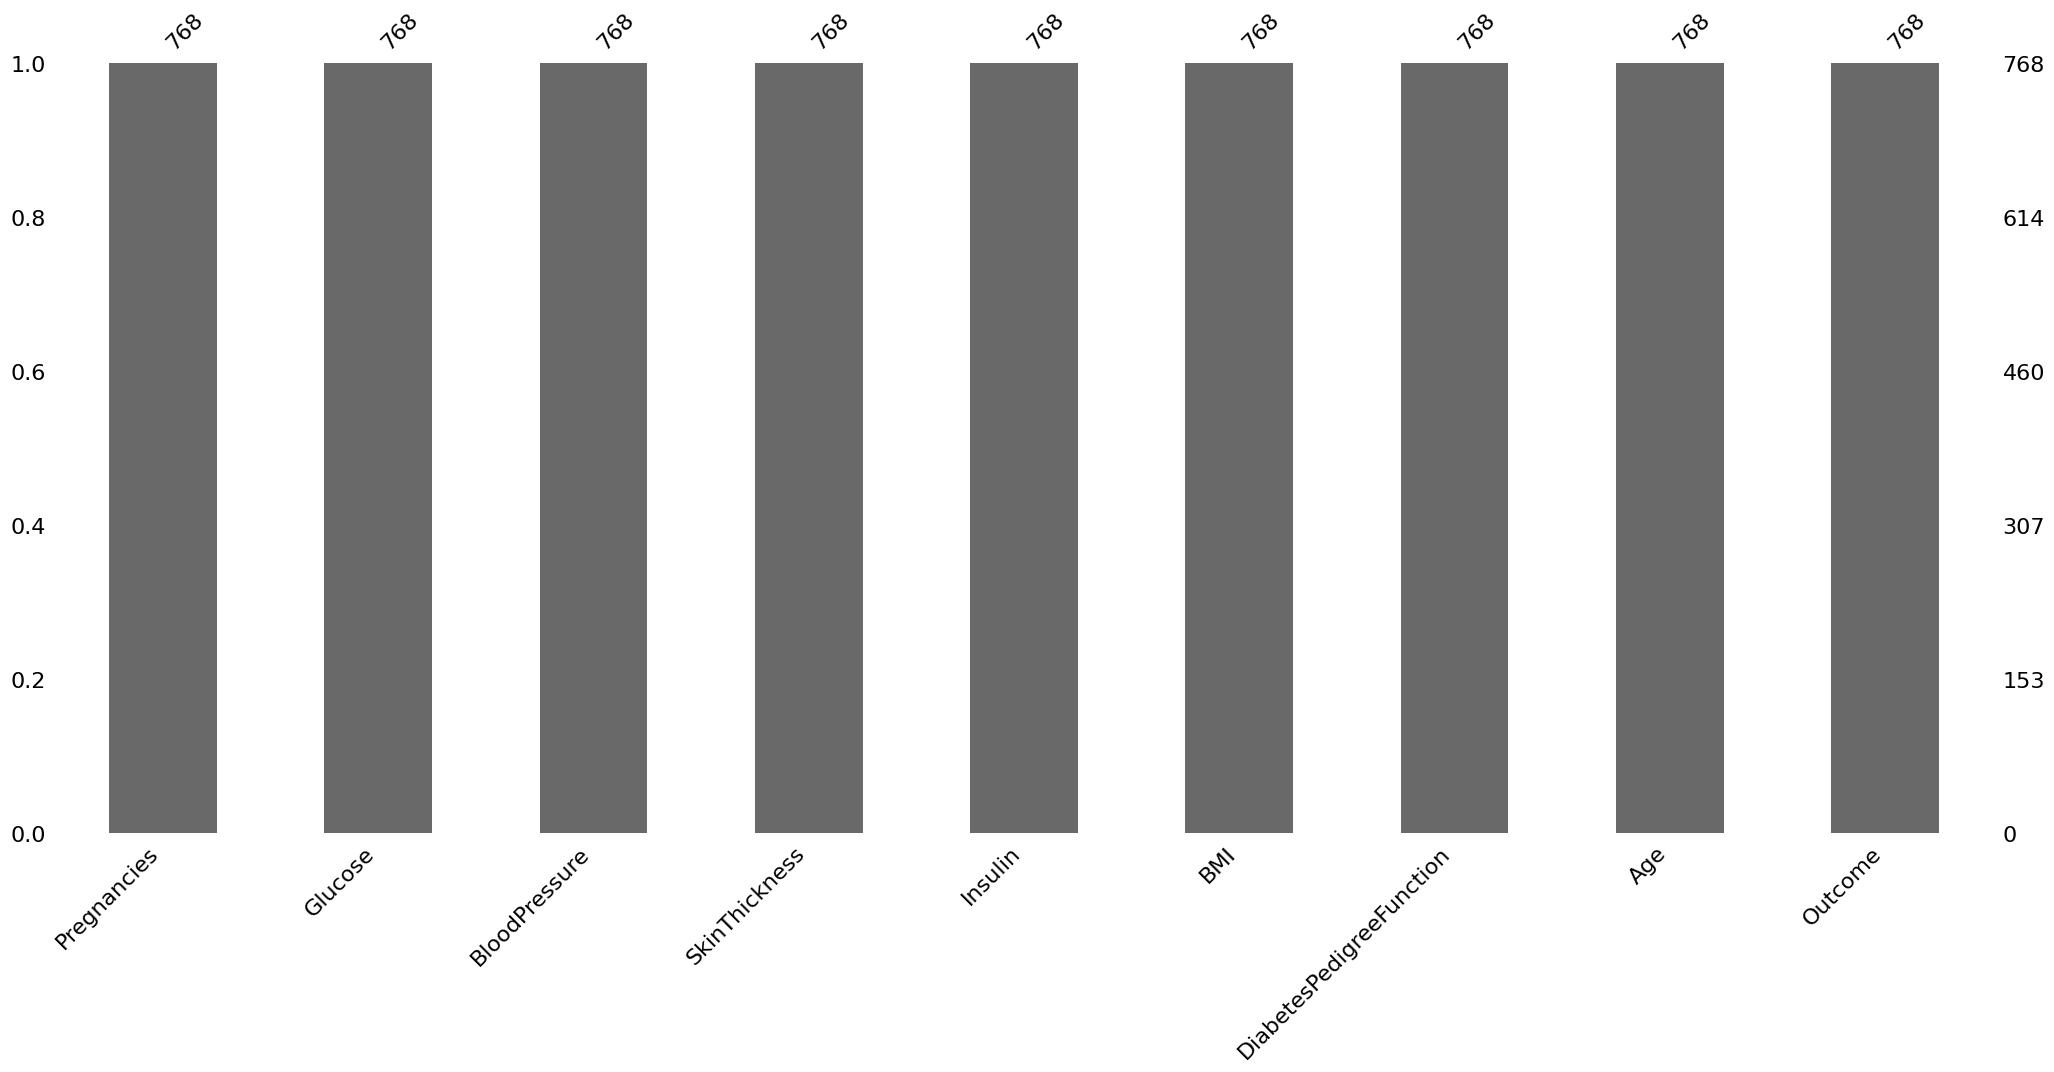

In [ ]:
no.bar(df)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.iloc[:,0:8]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Xfeatures = df.iloc[:,0:8]

In [ ]:
df.columns = df.columns.str.strip()

for col in ['Class', 'class', 'Outcome', 'Target', 'Label']:
    if col in df.columns:
        Ylabels = df[col]
        print(f"Ylabels set from column: {col}")
        break
else:
    print("Target column not found. Available columns:", df.columns.tolist())

Ylabels set from column: Outcome


In [ ]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [ ]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [ ]:
X.shape

(768, 8)

In [ ]:
# Example: defining a list
names = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Ivy", "Jack"]

# Now slicing works
print(names[0:8])

['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah']


In [ ]:
X = pd.DataFrame(X,columns=names[0:8])

In [ ]:
X.head()

,Alice,Bob,Charlie,David,Eve,Frank,Grace,Hannah
0,0.352941,0.743719,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.427136,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.919598,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.447236,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.688442,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000


In [ ]:
# Import the function
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, Ylabels, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.7597402597402597


In [ ]:
X_test.values[0]

array([0.35294118, 0.49246231, 0.34693878, 0.33333333, 0.22458629,
       0.32310838, 0.15029889, 0.36666667])

In [ ]:
import numpy as np
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[0]).reshape(1,-1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Load ML Interpreting Models
import shap

In [ ]:
# Initialize JS For Plot
shap.initjs()

In [ ]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/154 [00:00<?, ?it/s]

In [ ]:
import shap
import numpy as np

# Check shapes and types
print("Expected value:", explainer.expected_value)
print("Type:", type(explainer.expected_value))
print("SHAP values shape:", np.array(shap_values).shape)


Expected value: [0.65305925 0.34694075]
Type: <class 'numpy.ndarray'>
SHAP values shape: (154, 8, 2)


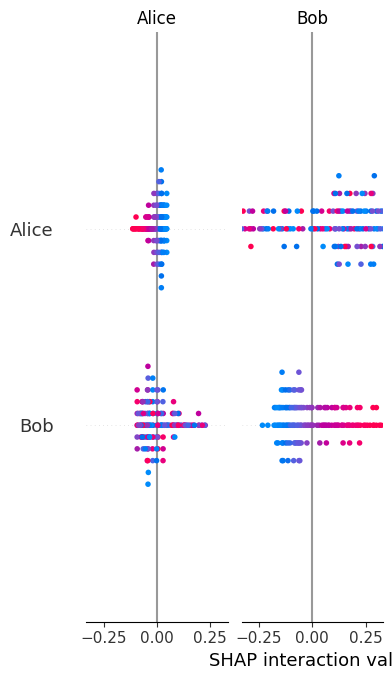

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
import shap
import numpy as np

# Check shapes
print("Type of shap_values:", type(shap_values))
print("Shape of shap_values as array:", np.array(shap_values).shape)


Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values as array: (154, 8, 2)


In [ ]:
Ylabels.unique()

array([1, 0])

In [ ]:
class_names = ['Non Diabetes','Diabetes']

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
feature_names = ['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age']

In [ ]:
# Sample We Predicted
X_test.iloc[0]

,668
Alice,0.352941
Bob,0.492462
Charlie,0.346939
David,0.333333
Eve,0.224586
Frank,0.323108
Grace,0.150299
Hannah,0.366667


In [ ]:
from sklearn.linear_model import LogisticRegression

# Example: train a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np

# Exact same order and names as training
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Example input (must match number of features)
input_data = (5, 166, 72, 19, 175, 25, 0.587, 51)

# Create DataFrame with same structure
input_df = pd.DataFrame([input_data], columns=feature_names)

# Transform and predict
std_data = scaler.transform(input_df)
prediction = classifier.predict(std_data)
print(prediction)

print(scaler.feature_names_in_)

# Human-readable output
if prediction[0] == 1:
    print("The person is diabetic")
else:
    print("The person is non-diabetic")

[1]
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
